# Preprocessing 


In [1]:
# loading requred packages for setting up the python Environment  
import numpy as np
import pandas as pd
import math # For mathematical calculations
import warnings       # To ignore any warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing  #requred packages for preprocessing

In [2]:
# loading requred packages for Ploting
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.offline as pyoff
import plotly.figure_factory as ff

In [3]:
dftrain = pd.read_excel("Train.xlsx") #loading the data sets 
dftest = pd.read_excel("Test.xlsx")

## Birds eye view 

In [4]:
dftest.shape

(9135, 5)

In [233]:
dftrain.shape

(42582, 21)

In [6]:
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep70101,C21844,PR6483,102,1115
1,Rep70102,C21844,PR6251,102,1050
2,Rep70103,C21844,PR6253,344,3490
3,Rep70104,C21844,PR6378,108,1095
4,Rep70105,C21844,PR6463,146,1055


In [5]:
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [234]:
dftrain.describe()

,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice,RatioOfQuantitySold,Total Pro SSP,RatioOfQuantiy,TransactionsPerProduct,TransactionsPerPerson,TotalValueOfProductPerPerson,AvgPricePerProduct,AvgSellingQuantitySalesPerson
count,4.258200e+04,4.258200e+04,42582.000000,42582.000000,4.258200e+04,4.258200e+04,42582.000000,42582.000000,42582.000000,42582.000000,42582.000000,4.258200e+04,42582.000000,42582.000000,42582.000000,4.258200e+04,42582.000000,42582.000000
mean,4.910048e+03,1.620923e+04,2.931497,16.372971,1.620923e+04,4.910048e+03,4910.048354,4910.048354,16209.229886,16209.229886,1.000000,1.429621e+05,1.000000,370.863369,177.615424,3.551024e+05,16.372971,4910.048354
std,9.833621e+04,5.997195e+04,0.268911,79.544612,4.553143e+04,2.786132e+04,19387.262029,15989.026680,27416.043266,25713.607066,3.250518,8.841126e+05,0.729992,615.520014,253.469319,1.143535e+06,12.506009,19387.262029
min,3.300000e+01,5.980000e+02,1.000000,0.005320,6.000000e+02,3.500000e+01,85.000000,70.724138,1042.500000,1005.000000,0.000737,3.500000e+01,0.000216,1.000000,1.000000,8.650000e+02,0.209950,85.000000
25%,1.110000e+02,1.345000e+03,3.000000,6.781874,1.772500e+03,1.265000e+02,207.071429,350.950649,4509.334737,3090.000000,0.211610,1.119000e+03,0.658225,62.000000,38.000000,1.420500e+04,9.673872,207.071429
50%,2.060000e+02,2.980000e+03,3.000000,10.742574,4.599667e+03,2.912500e+02,543.000000,658.355408,8257.249147,8158.020134,0.430518,3.898000e+03,0.977249,153.000000,79.000000,5.413500e+04,14.164825,543.000000
75%,1.136000e+03,1.076500e+04,3.000000,16.385542,1.400333e+04,1.517000e+03,2956.138539,2477.636364,18344.122517,19361.166667,0.947844,2.129100e+04,1.116435,373.000000,266.000000,2.102600e+05,20.898267,2956.138539
max,1.970813e+07,3.953985e+06,3.000000,11297.100000,1.187479e+06,1.023265e+06,407988.750000,241711.181818,684285.862069,529608.636364,252.801294,2.046530e+07,33.638545,2590.000000,1359.000000,1.965921e+07,209.911386,407988.750000


In [235]:
dftest.describe()

,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice,RatioOfQuantitySold,Total Pro SSP,RatioOfQuantiy,TransactionsPerProduct,TransactionsPerPerson,TotalValueOfProductPerPerson,AvgPricePerProduct,AvgSellingQuantitySalesPerson
count,9.135000e+03,9.135000e+03,9135.000000,9.135000e+03,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000,9135.000000,9.135000e+03,9135.000000,9135.000000,9135.000000,9.135000e+03,9135.000000,9135.000000
mean,3.096870e+03,1.154211e+04,61.291538,1.154211e+04,3096.869622,3096.869622,3096.869622,11542.113629,11542.113629,1.000000,5.241753e+04,1.000000,94.481554,184.620361,1.813843e+05,61.291538,3096.869622
std,2.230443e+04,3.671294e+04,225.660328,3.100267e+04,16004.710679,10995.345135,12302.473044,18416.011424,20158.375063,1.780042,2.529150e+05,0.701822,145.929255,262.260189,4.705023e+05,116.401299,10995.345135
min,3.500000e+01,9.350000e+02,0.004675,1.005000e+03,37.000000,92.000000,55.000000,1005.000000,1025.000000,0.001996,3.700000e+01,0.002042,1.000000,1.000000,1.005000e+03,0.034082,92.000000
25%,1.070000e+02,1.205000e+03,1.706336,1.375000e+03,118.250000,164.895522,167.426230,2342.863248,2411.525424,0.308446,9.820000e+02,0.749127,22.000000,30.000000,1.186500e+04,9.748638,164.895522
50%,1.610000e+02,2.235000e+03,9.857143,2.940000e+03,211.000000,480.216049,476.740741,5101.100993,5849.861111,0.732026,3.098000e+03,0.983326,46.000000,68.000000,3.476000e+04,22.108794,480.216049
75%,6.800000e+02,7.817500e+03,29.049754,1.058321e+04,976.000000,1928.676471,1628.558140,14769.500000,15692.597087,1.058512,9.029000e+03,1.088290,86.000000,185.000000,1.188650e+05,69.575288,1928.676471
max,1.215516e+06,1.298690e+06,4565.735294,1.159102e+06,433039.750000,127214.175000,211548.823529,213000.714286,365809.615385,77.101539,3.464318e+06,27.776330,604.000000,875.000000,3.477305e+06,1384.310942,127214.175000


In [236]:
dftrain.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 42582 entries, 0 to 42581
Data columns (total 21 columns):
ReportID                         42582 non-null object
SalesPersonID                    42582 non-null object
ProductID                        42582 non-null object
Quantity                         42582 non-null int64
TotalSalesValue                  42582 non-null int64
Suspicious                       42582 non-null int64
OneUnitSalesValue                42582 non-null float64
AvgSelingPrice                   42582 non-null float64
AvgQuantity                      42582 non-null float64
AvgQuantityperguy                42582 non-null float64
AvgQuantityperProduct            42582 non-null float64
AvgSalesValueperProduct          42582 non-null float64
AvgTransactionsSalesPrice        42582 non-null float64
RatioOfQuantitySold              42582 non-null float64
Total Pro SSP                    42582 non-null int64
RatioOfQuantiy                   42582 non-null float64
Transaction

In [238]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9135 entries, 0 to 9134
Data columns (total 20 columns):
ReportID                         9135 non-null object
SalesPersonID                    9135 non-null object
ProductID                        9135 non-null object
Quantity                         9135 non-null int64
TotalSalesValue                  9135 non-null int64
OneUnitSalesValue                9135 non-null float64
AvgSelingPrice                   9135 non-null float64
AvgQuantity                      9135 non-null float64
AvgQuantityperguy                9135 non-null float64
AvgQuantityperProduct            9135 non-null float64
AvgSalesValueperProduct          9135 non-null float64
AvgTransactionsSalesPrice        9135 non-null float64
RatioOfQuantitySold              9135 non-null float64
Total Pro SSP                    9135 non-null int64
RatioOfQuantiy                   9135 non-null float64
TransactionsPerProduct           9135 non-null int64
TransactionsPerPerson        

## Creating more attributes  
If new attributes can or help define the variables in the target attributes and the model will 
be able to understand difference between the Yes No and indeterminate and predict better

### oneunitSalesValue:
Price for a unit value 

In [7]:
oneunitSalesValue = dftrain['TotalSalesValue']/dftrain['Quantity']
dftrain["OneUnitSalesValue"]=oneunitSalesValue
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030
3,Rep10104,C21116,PR6253,283,4495,No,15.883392
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815


In [8]:
oneunitSalesValue = dftest['TotalSalesValue']/dftrain['Quantity']
dftest["OneUnitSalesValue"]=oneunitSalesValue
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue
0,Rep70101,C21844,PR6483,102,1115,6.126374
1,Rep70102,C21844,PR6251,102,1050,5.769231
2,Rep70103,C21844,PR6253,344,3490,34.554455
3,Rep70104,C21844,PR6378,108,1095,3.869258
4,Rep70105,C21844,PR6463,146,1055,9.768519


### looking at where its contributing more 

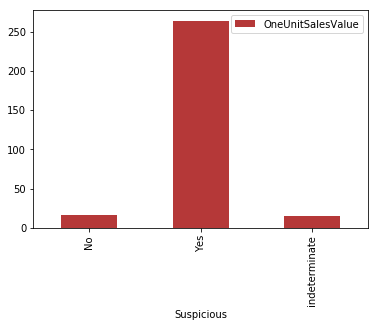

In [9]:
dftrain.groupby(['Suspicious'])[['OneUnitSalesValue']].mean().plot.bar(color = "#b53838")

In [10]:
#dftrain.drop(dftrain['AvgUnitSales'],axis = 1)

### AvgSelingPrice :
Average selling price for a given product, I got iy by taking the average of TotalSalesValue with respect by product ID

In [11]:
df1=dftrain.groupby(['SalesPersonID','ProductID']).mean()['TotalSalesValue']
df1 = (pd.DataFrame(df1))
df1 = df1.reset_index()
df1.columns

Index(['SalesPersonID', 'ProductID', 'TotalSalesValue'], dtype='object')

In [12]:
dftrain=pd.merge(dftrain,df1,on=['SalesPersonID','ProductID'],how='left')
dftrain = dftrain.rename(index = str,columns ={'TotalSalesValue_x':'TotalSalesValue','TotalSalesValue_y':'AvgSelingPrice'})
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5


In [13]:
tdf1=dftest.groupby(['SalesPersonID','ProductID']).mean()['TotalSalesValue']
tdf1 = (pd.DataFrame(tdf1))
tdf1 = tdf1.reset_index()
tdf1.columns

Index(['SalesPersonID', 'ProductID', 'TotalSalesValue'], dtype='object')

In [14]:
dftest=pd.merge(dftest,tdf1,on=['SalesPersonID','ProductID'],how='left')
dftest = dftest.rename(index = str,columns ={'TotalSalesValue_x':'TotalSalesValue','TotalSalesValue_y':'AvgSelingPrice'})
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0


### Lets see the what insites does this attribute give

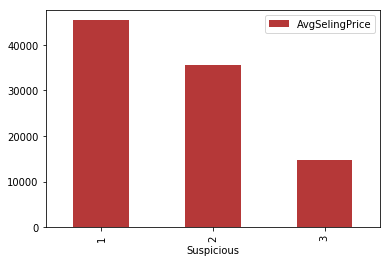

In [127]:
dftrain.groupby(['Suspicious'])[['AvgSelingPrice']].mean().plot.bar(color = "#b53838")

### AvgQuantity:
Average Quantity sold for a given product

In [18]:
df1=dftrain.groupby(['SalesPersonID','ProductID']).mean()['Quantity']
df1 = (pd.DataFrame(df1))
df1 = df1.reset_index()
df1.columns

Index(['SalesPersonID', 'ProductID', 'Quantity'], dtype='object')

In [19]:
dftrain=pd.merge(dftrain,df1,on=['SalesPersonID','ProductID'],how='left')
dftrain = dftrain.rename(index = str,columns ={'TotalSalesValue_x':'TotalSalesValue','Quantity_x':'Quantity','Quantity_y':'AvgQuantity'})
#dftrain.drop(dftrain['TotalSalesValue_y'],axis = 1)
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5


In [20]:
tdf1=dftest.groupby(['SalesPersonID','ProductID']).mean()['Quantity']
tdf1 = (pd.DataFrame(tdf1))
tdf1 = tdf1.reset_index()
tdf1.columns

Index(['SalesPersonID', 'ProductID', 'Quantity'], dtype='object')

In [21]:
dftest=pd.merge(dftest,tdf1,on=['SalesPersonID','ProductID'],how='left')
dftest = dftest.rename(index = str,columns ={'TotalSalesValue_x':'TotalSalesValue','Quantity_x':'Quantity','Quantity_y':'AvgQuantity'})
#dftrain.drop(dftrain['AvgQuantity'],axis = 1)
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8


### Lets see the what insites does this attribute give

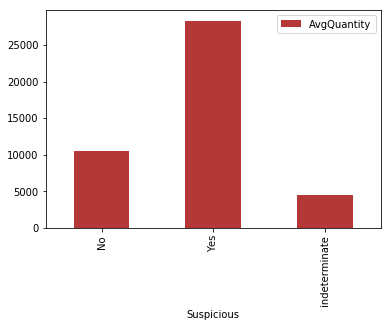

In [22]:
dftrain.groupby(['Suspicious'])[['AvgQuantity']].mean().plot.bar(color = "#b53838")

### AvgQuantityperguy:
Average Quantity sold for a given SalesPerson

In [23]:
AvgQuantityperguy=dftrain.groupby(['SalesPersonID']).mean()['AvgQuantity']
AvgQuantityperguy=pd.DataFrame(AvgQuantityperguy)
#AvgQuantityperguy.head()

In [24]:
dftrain=pd.merge(dftrain,AvgQuantityperguy,on=['SalesPersonID'],how='left')
dftrain=dftrain.rename(index=str, columns={"AvgQuantity_y": "AvgQuantityperguy"})
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity_x,AvgQuantityperguy
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9


In [25]:
AvgQuantityperguy=dftest.groupby(['SalesPersonID']).mean()['AvgQuantity']
AvgQuantityperguy=pd.DataFrame(AvgQuantityperguy)
#AvgQuantityperguy.head()

In [26]:
dftest=pd.merge(dftest,AvgQuantityperguy,on=['SalesPersonID'],how='left')
dftest=dftest.rename(index=str, columns={"AvgQuantity_y": "AvgQuantityperguy"})

dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity_x,AvgQuantityperguy
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0,147.3
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0,147.3
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5,147.3
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0,147.3
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8,147.3


In [27]:
AvgQuantityperProduct=dftrain.groupby(['ProductID']).mean()['Quantity']
AvgQuantityperProduct=pd.DataFrame(AvgQuantityperProduct)
#AvgQuantityperguy.head()

### AvgQuantityperProduct:
Average Quantity sold for a given ProductID

In [28]:
dftrain=pd.merge(dftrain,AvgQuantityperProduct,on=['ProductID'],how='left')
dftrain=dftrain.rename(index=str, columns={"Quantity_y": "AvgQuantityperProduct"})
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity_x,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity_x,AvgQuantityperguy,AvgQuantityperProduct
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9,591.650888
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9,591.650888
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9,471.563320
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9,471.563320
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9,224.248227


### Lets see the what insites does this attribute give

In [31]:
dftest=pd.merge(dftest,AvgQuantityperProduct,on=['ProductID'],how='left')
dftest=dftest.rename(index=str, columns={"Quantity_y": "AvgQuantityperProduct"})

dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity_x,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity_x,AvgQuantityperguy,AvgQuantityperProduct
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0,147.3,192.702128
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0,147.3,387.523077
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5,147.3,729.142384
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0,147.3,130.835443
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8,147.3,204.454545


In [30]:
AvgQuantityperProduct=dftest.groupby(['ProductID']).mean()['Quantity']
AvgQuantityperProduct=pd.DataFrame(AvgQuantityperProduct)
#AvgQuantityperguy.head()

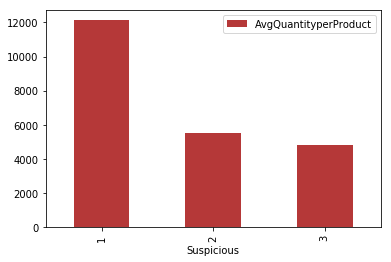

In [128]:
dftrain.groupby(['Suspicious'])[['AvgQuantityperProduct']].mean().plot.bar(color = "#b53838")

### AvgSalesValueperProduct:
Average TotalSalesValue sold for a given ProductID

In [32]:
AvgSalesValueperProduct=dftrain.groupby(['ProductID']).mean()['TotalSalesValue']
AvgSalesValueperProduct=pd.DataFrame(AvgSalesValueperProduct)
#AvgSalesValueperProduct.head()

In [33]:
dftrain=pd.merge(dftrain,AvgSalesValueperProduct,on=['ProductID'],how='left')
dftrain=dftrain.rename(index=str, columns={"TotalSalesValue_y": "AvgSalesValueperProduct",'TotalSalesValue_x':'TotalSalesValue','Quantity_x':'Quantity','AvgQuantity_x':'AvgQuantity'})
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9,591.650888,6876.035503
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9,591.650888,6876.035503
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9,471.563320,5612.323552
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9,471.563320,5612.323552
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9,224.248227,5203.262411


In [34]:
AvgSalesValueperProduct=dftest.groupby(['ProductID']).mean()['TotalSalesValue']
AvgSalesValueperProduct=pd.DataFrame(AvgSalesValueperProduct)
#AvgSalesValueperProduct.head()

In [35]:
dftest=pd.merge(dftest,AvgSalesValueperProduct,on=['ProductID'],how='left')
dftest=dftest.rename(index=str, columns={"TotalSalesValue_y": "AvgSalesValueperProduct",'TotalSalesValue_x':'TotalSalesValue','Quantity_x':'Quantity','AvgQuantity_x':'AvgQuantity'})
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0,147.3,192.702128,1840.106383
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0,147.3,387.523077,3268.692308
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5,147.3,729.142384,5101.100993
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0,147.3,130.835443,2788.544304
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8,147.3,204.454545,1558.636364


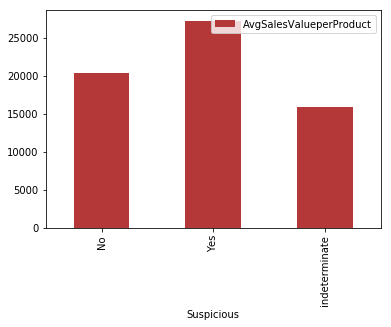

In [36]:
dftrain.groupby(['Suspicious'])[['AvgSalesValueperProduct']].mean().plot.bar(color = "#b53838")

### AvgTransactionsSalesPrice:
Average TotalSalesValue sold for a given SalesPersonID

In [37]:
AvgTransactionsSalesPrice = dftrain.groupby(['SalesPersonID'])[['TotalSalesValue']].mean()
AvgTransactionsSalesPrice = AvgTransactionsSalesPrice.rename(columns={'TotalSalesValue': 'AvgTransactionsSalesPrice'})
dftrain = dftrain.join(AvgTransactionsSalesPrice,on = ['SalesPersonID'])
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9,591.650888,6876.035503,2408.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9,591.650888,6876.035503,2408.0
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9,471.563320,5612.323552,2408.0
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9,471.563320,5612.323552,2408.0
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9,224.248227,5203.262411,2408.0


In [38]:
AvgTransactionsSalesPrice = dftest.groupby(['SalesPersonID'])[['TotalSalesValue']].mean()
AvgTransactionsSalesPrice = AvgTransactionsSalesPrice.rename(columns={'TotalSalesValue': 'AvgTransactionsSalesPrice'})
dftest = dftest.join(AvgTransactionsSalesPrice,on = ['SalesPersonID'])
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0,147.3,192.702128,1840.106383,1422.0
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0,147.3,387.523077,3268.692308,1422.0
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5,147.3,729.142384,5101.100993,1422.0
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0,147.3,130.835443,2788.544304,1422.0
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8,147.3,204.454545,1558.636364,1422.0


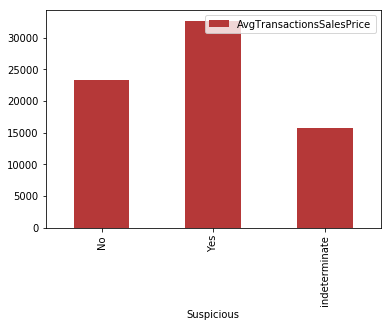

In [39]:
dftrain.groupby(['Suspicious'])[['AvgTransactionsSalesPrice']].mean().plot.bar(color = "#b53838")

In [40]:
dftrain['RatioOfQuantitySold'] = dftrain['Quantity']/dftrain['AvgQuantityperProduct']

In [41]:
dftest['RatioOfQuantitySold'] = dftest['Quantity']/dftest['AvgQuantityperProduct']

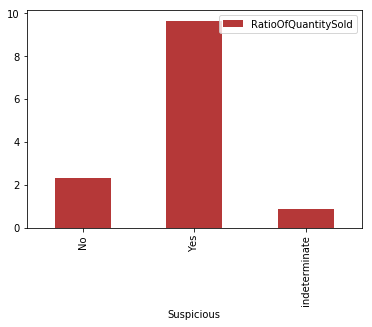

In [42]:
dftrain.groupby(['Suspicious'])[['RatioOfQuantitySold']].mean().plot.bar(color = "#b53838")

### TotalProductperSalesPerson
Average TotalSalesValue sold for a given SalesPersonID

In [43]:
df7 = dftrain.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
df7 = df7.rename(columns={'Quantity': 'TotalProductperSalesPerson'})
dftrain = dftrain.join(df7,on=['SalesPersonID','ProductID'])
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice,RatioOfQuantitySold,Total Pro SSP
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9,591.650888,6876.035503,2408.0,0.307614,546
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9,591.650888,6876.035503,2408.0,0.307614,546
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9,471.563320,5612.323552,2408.0,0.214181,908
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9,471.563320,5612.323552,2408.0,0.600131,908
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9,224.248227,5203.262411,2408.0,0.481609,225


In [44]:
df7 = dftest.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
df7 = df7.rename(columns={'Quantity': 'TotalProductperSalesPerson'})
dftest = dftest.join(df7,on=['SalesPersonID','ProductID'])
dftest.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice,RatioOfQuantitySold,Total Pro SSP
0,Rep70101,C21844,PR6483,102,1115,6.126374,1115.0,102.0,147.3,192.702128,1840.106383,1422.0,0.529314,408
1,Rep70102,C21844,PR6251,102,1050,5.769231,1050.0,102.0,147.3,387.523077,3268.692308,1422.0,0.263210,408
2,Rep70103,C21844,PR6253,344,3490,34.554455,2252.5,225.5,147.3,729.142384,5101.100993,1422.0,0.471787,451
3,Rep70104,C21844,PR6378,108,1095,3.869258,1095.0,108.0,147.3,130.835443,2788.544304,1422.0,0.825464,432
4,Rep70105,C21844,PR6463,146,1055,9.768519,1071.0,155.8,147.3,204.454545,1558.636364,1422.0,0.714095,779


### RatioOfQuantiy:
Quantity by Average Quantity sold for a given product gives the ratio of the Quantity sold

In [45]:
dftrain['RatioOfQuantiy'] = dftrain['Quantity']/dftrain['AvgQuantity']

In [46]:
dftest['RatioOfQuantiy'] = dftest['Quantity']/dftest['AvgQuantity']

### TransactionsPerProduct
Number of Transactions per product per SalesPerson

In [47]:
TransactionsPerProduct = dftrain.groupby(['ProductID'])[['SalesPersonID']].count()
TransactionsPerProduct = TransactionsPerProduct.rename(columns={'SalesPersonID': 'TransactionsPerProduct'})
dftrain = dftrain.join(TransactionsPerProduct,on=['ProductID'])

In [48]:
TransactionsPerProduct = dftest.groupby(['ProductID'])[['SalesPersonID']].count()
TransactionsPerProduct = TransactionsPerProduct.rename(columns={'SalesPersonID': 'TransactionsPerProduct'})
dftest = dftest.join(TransactionsPerProduct,on=['ProductID'])

In [50]:
TransactionsPerPersom = dftrain.groupby(['SalesPersonID'])[['ProductID']].count()
TransactionsPerPersom = TransactionsPerPersom.rename(columns={'ProductID': 'TransactionsPerPerson'})
dftrain = dftrain.join(TransactionsPerPersom,on=['SalesPersonID'])

In [51]:
TransactionsPerPersom = dftest.groupby(['SalesPersonID'])[['ProductID']].count()
TransactionsPerPersom = TransactionsPerPersom.rename(columns={'ProductID': 'TransactionsPerPerson'})
dftest = dftest.join(TransactionsPerPersom,on=['SalesPersonID'])

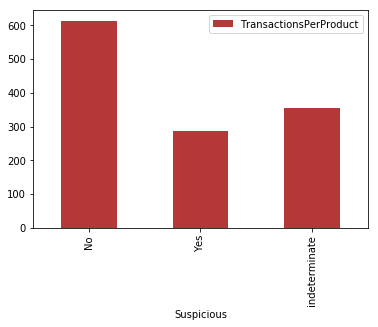

In [49]:
dftrain.groupby(['Suspicious'])[['TransactionsPerProduct']].mean().plot.bar(color = "#b53838")

### TotalValueOfProductPerPerson:
Total value of product sold per SalesPerson

In [52]:
TotalValueOfProductPerPerson = dftrain.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
TotalValueOfProductPerPerson=TotalValueOfProductPerPerson.rename(columns={'TotalSalesValue': 'TotalValueOfProductPerPerson'})
dftrain = dftrain.join(TotalValueOfProductPerPerson,on=['SalesPersonID','ProductID'])

In [53]:
TotalValueOfProductPerPerson = dftest.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
TotalValueOfProductPerPerson=TotalValueOfProductPerPerson.rename(columns={'TotalSalesValue': 'TotalValueOfProductPerPerson'})
dftest = dftest.join(TotalValueOfProductPerPerson,on=['SalesPersonID','ProductID'])

### AvgPricePerProduct:
Average UnitSalesValue sold for a given ProductID

In [54]:
AvgPricePerProduct = dftrain.groupby(['ProductID'])[['OneUnitSalesValue']].mean()
AvgPricePerProduct = AvgPricePerProduct.rename(columns={'OneUnitSalesValue': 'AvgPricePerProduct'})
dftrain = dftrain.join(AvgPricePerProduct,on ='ProductID')
dftrain.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,OneUnitSalesValue,AvgSelingPrice,AvgQuantity,AvgQuantityperguy,AvgQuantityperProduct,AvgSalesValueperProduct,AvgTransactionsSalesPrice,RatioOfQuantitySold,Total Pro SSP,RatioOfQuantiy,TransactionsPerProduct,TransactionsPerPerson,TotalValueOfProductPerPerson,AvgPricePerProduct
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,1715.0,182.0,182.9,591.650888,6876.035503,2408.0,0.307614,546,1.000000,169,10,5145,14.164825
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,1715.0,182.0,182.9,591.650888,6876.035503,2408.0,0.307614,546,1.000000,169,10,5145,14.164825
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,3327.5,227.0,182.9,471.563320,5612.323552,2408.0,0.214181,908,0.444934,2590,10,13310,16.161482
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,3327.5,227.0,182.9,471.563320,5612.323552,2408.0,0.600131,908,1.246696,2590,10,13310,16.161482
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,1662.5,112.5,182.9,224.248227,5203.262411,2408.0,0.481609,225,0.960000,141,10,3325,20.898267


In [55]:
AvgPricePerProduct = dftest.groupby(['ProductID'])[['OneUnitSalesValue']].mean()
AvgPricePerProduct = AvgPricePerProduct.rename(columns={'OneUnitSalesValue': 'AvgPricePerProduct'})
dftest = dftest.join(AvgPricePerProduct,on ='ProductID')

### AvgSellingQuantitySalesPerson:
Average Quantity sold for a given SalesPerson

In [56]:
AvgSellingQuantitySalesPerson = dftrain.groupby(['SalesPersonID'])[['Quantity']].mean()
AvgSellingQuantitySalesPerson = AvgSellingQuantitySalesPerson.rename(columns={'Quantity': 'AvgSellingQuantitySalesPerson'})
dftrain = dftrain.join(AvgSellingQuantitySalesPerson,on=['SalesPersonID'])

In [57]:
AvgSellingQuantitySalesPerson = dftest.groupby(['SalesPersonID'])[['Quantity']].mean()
AvgSellingQuantitySalesPerson = AvgSellingQuantitySalesPerson.rename(columns={'Quantity': 'AvgSellingQuantitySalesPerson'})
dftest = dftest.join(AvgSellingQuantitySalesPerson,on=['SalesPersonID'])

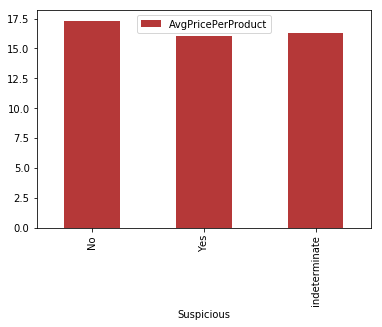

In [58]:
dftrain.groupby(['Suspicious'])[['AvgPricePerProduct']].mean().plot.bar(color = "#b53838")

In [59]:
#just having a copy 
data = dftrain 

In [60]:
# replacing the vaule in the traget attribute
Suspicious_dict = {'Yes':1, 'No':2, 'indeterminate':3}

data['Suspicious'] = data['Suspicious'].replace(Suspicious_dict, regex=True)

In [61]:
#just having a copy
testdata = dftest

In [62]:
testdata.shape

(9135, 20)

### droping some attributes (Id's)

In [63]:
data = data.drop(['ReportID'],axis=1)
data=data.drop(axis=1,columns=['ProductID','SalesPersonID'])

In [64]:
testdata = testdata.drop(['ReportID'],axis=1)
testdata=testdata.drop(axis=1,columns=['ProductID','SalesPersonID'])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42582 entries, 0 to 42581
Data columns (total 18 columns):
Quantity                         42582 non-null int64
TotalSalesValue                  42582 non-null int64
Suspicious                       42582 non-null int64
OneUnitSalesValue                42582 non-null float64
AvgSelingPrice                   42582 non-null float64
AvgQuantity                      42582 non-null float64
AvgQuantityperguy                42582 non-null float64
AvgQuantityperProduct            42582 non-null float64
AvgSalesValueperProduct          42582 non-null float64
AvgTransactionsSalesPrice        42582 non-null float64
RatioOfQuantitySold              42582 non-null float64
Total Pro SSP                    42582 non-null int64
RatioOfQuantiy                   42582 non-null float64
TransactionsPerProduct           42582 non-null int64
TransactionsPerPerson            42582 non-null int64
TotalValueOfProductPerPerson     42582 non-null int64
AvgPricePerPro

In [66]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9135 entries, 0 to 9134
Data columns (total 17 columns):
Quantity                         9135 non-null int64
TotalSalesValue                  9135 non-null int64
OneUnitSalesValue                9135 non-null float64
AvgSelingPrice                   9135 non-null float64
AvgQuantity                      9135 non-null float64
AvgQuantityperguy                9135 non-null float64
AvgQuantityperProduct            9135 non-null float64
AvgSalesValueperProduct          9135 non-null float64
AvgTransactionsSalesPrice        9135 non-null float64
RatioOfQuantitySold              9135 non-null float64
Total Pro SSP                    9135 non-null int64
RatioOfQuantiy                   9135 non-null float64
TransactionsPerProduct           9135 non-null int64
TransactionsPerPerson            9135 non-null int64
TotalValueOfProductPerPerson     9135 non-null int64
AvgPricePerProduct               9135 non-null float64
AvgSellingQuantitySalesPerson 

### conveting attribute to integers 

In [67]:
data['OneUnitSalesValue']=data['OneUnitSalesValue'].astype('int64')
data['AvgSelingPrice']=data['AvgSelingPrice'].astype('int64')
data['AvgQuantity']=data['AvgQuantity'].astype('int64')
data['RatioOfQuantiy']=data['RatioOfQuantiy'].astype('int64')
data['TotalProductperSalesPerson']=data['TotalProductperSalesPerson'].astype('int64')
data['AvgQuantityperguy']=data['AvgQuantityperguy'].astype('int64')
data['AvgQuantityperProduct']=data['AvgQuantityperProduct'].astype('int64')
data['AvgSalesValueperProduct']=data['AvgSalesValueperProduct'].astype('int64')
data['RatioOfQuantitySold']=data['RatioOfQuantitySold'].astype('int64')
data['TransactionsPerProduct']=data['TransactionsPerProduct'].astype('int64')
data['TransactionsPerPerson']=data['TransactionsPerPerson'].astype('int64')
data['TotalValueOfProductPerPerson']=data['TotalValueOfProductPerPerson'].astype('int64')
data['AvgPricePerProduct']=data['AvgPricePerProduct'].astype('int64')
data['AvgSellingQuantitySalesPerson']=data['AvgSellingQuantitySalesPerson'].astype('int64')

In [68]:
testdata['OneUnitSalesValue']=testdata['OneUnitSalesValue'].astype('int64')
testdata['AvgSelingPrice']=testdata['AvgSelingPrice'].astype('int64')
testdata['AvgQuantity']=testdata['AvgQuantity'].astype('int64')
testdata['RatioOfQuantiy']=testdata['RatioOfQuantiy'].astype('int64')
testdata['Total Pro SSP']=testdata['Total Pro SSP'].astype('int64')
testdata['AvgQuantityperguy']=testdata['AvgQuantityperguy'].astype('int64')
testdata['AvgQuantityperProduct']=testdata['AvgQuantityperProduct'].astype('int64')
testdata['AvgSalesValueperProduct']=testdata['AvgSalesValueperProduct'].astype('int64')
testdata['RatioOfQuantitySold']=testdata['RatioOfQuantitySold'].astype('int64')
testdata['TransactionsPerProduct']=testdata['TransactionsPerProduct'].astype('int64')
testdata['TransactionsPerPerson']=testdata['TransactionsPerPerson'].astype('int64')
testdata['TotalValueOfProductPerPerson']=testdata['TotalValueOfProductPerPerson'].astype('int64')
testdata['AvgPricePerProduct']=testdata['AvgPricePerProduct'].astype('int64')
testdata['AvgSellingQuantitySalesPerson']=testdata['AvgSellingQuantitySalesPerson'].astype('int64')

In [69]:
data.columns

Index(['Quantity', 'TotalSalesValue', 'Suspicious', 'OneUnitSalesValue',
       'AvgSelingPrice', 'AvgQuantity', 'AvgQuantityperguy',
       'AvgQuantityperProduct', 'AvgSalesValueperProduct',
       'AvgTransactionsSalesPrice', 'RatioOfQuantitySold', 'Total Pro SSP',
       'RatioOfQuantiy', 'TransactionsPerProduct', 'TransactionsPerPerson',
       'TotalValueOfProductPerPerson', 'AvgPricePerProduct',
       'AvgSellingQuantitySalesPerson'],
      dtype='object')

In [70]:
testdata.columns

Index(['Quantity', 'TotalSalesValue', 'OneUnitSalesValue', 'AvgSelingPrice',
       'AvgQuantity', 'AvgQuantityperguy', 'AvgQuantityperProduct',
       'AvgSalesValueperProduct', 'AvgTransactionsSalesPrice',
       'RatioOfQuantitySold', 'Total Pro SSP', 'RatioOfQuantiy',
       'TransactionsPerProduct', 'TransactionsPerPerson',
       'TotalValueOfProductPerPerson', 'AvgPricePerProduct',
       'AvgSellingQuantitySalesPerson'],
      dtype='object')

In [129]:
# loading the attributes to a feat_columns
feat_col = ['Quantity', 'TotalSalesValue',
       'OneUnitSalesValue','AvgSelingPrice','RatioOfQuantitySold','AvgQuantity', 'AvgQuantityperguy', 'AvgQuantityperProduct',
       'AvgSalesValueperProduct','AvgTransactionsSalesPrice','TotalProductperSalesPerson','RatioOfQuantiy', 'TransactionsPerProduct','TransactionsPerPerson','TotalValueOfProductPerPerson',
           'AvgPricePerProduct','AvgSellingQuantitySalesPerson']

In [72]:
# numbers of rows and columns for the given 
data.shape

(42582, 18)

In [73]:
testdata.shape

(9135, 17)

In [74]:
data[feat_col].shape

(42582, 17)

## Split to Train and Validation

In [75]:
from sklearn.model_selection import train_test_split #loading the requred packages for the split 
X=data[feat_col]
y=data['Suspicious']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [76]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

C:\Annaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Annaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Annaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Annaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [77]:
# numbers of rows and columns for the given 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31936, 17)
(10646, 17)
(31936,)
(10646,)


In [78]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Model building 
## Knn

In [79]:
# loading the package for the KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) #fitting the model for the given data set(train set) this where the model learns 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
#from the learnt model we are predicting for the unknowns
knn_train_predictions_train=knn.predict(X_train)
knn_test_predictions_test=knn.predict(X_test)

In [83]:
# from sklearn.metrics with classification_report we can validate the model by recall in this multiclass classification
from sklearn.metrics import classification_report
print(classification_report(y_train, knn_train_predictions_train))
print(classification_report(y_test, knn_test_predictions_test))

              precision    recall  f1-score   support

           1       0.35      0.29      0.32        45
           2       0.65      0.31      0.42       639
           3       0.96      0.99      0.97      9962

   micro avg       0.94      0.94      0.94     10646
   macro avg       0.65      0.53      0.57     10646
weighted avg       0.93      0.94      0.94     10646



In [80]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Annaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

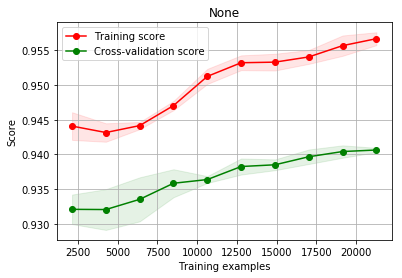

In [81]:
plot_learning_curve(knn, title=None,X=X_train, y=y_train)

## RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400,max_depth = 5,criterion = 'entropy',class_weight = 'balanced',max_features = 3,random_state = 123)
RandomForestClassifier(random_state= 42)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
rf.fit(X_train,y_train)#fitting the model for the given data set(train set) this where the model learns 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=None, oob_score=False,
            random_state=123, verbose=0, warm_start=False)

In [86]:
#from the learnt model we are predicting for the unknowns 
rf_train_predictions_train=rf.predict(X_train)
rf_test_predictions_test=rf.predict(X_test)

In [87]:
# from sklearn metrics we create the confusion matrix to validate the given model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,rf_test_predictions_test)
cnf_matrix

array([[  37,    3,    5],
       [ 134,  250,  255],
       [2818,  883, 6261]], dtype=int64)

In [88]:
print("Accuracy:",metrics.accuracy_score(y_train, rf_train_predictions_train))
print("Precision:",metrics.precision_score(y_train, rf_train_predictions_train,average='macro'))
print("Recall:",metrics.recall_score(y_train, rf_train_predictions_train,average='macro'))
print("F1 score:",metrics.f1_score(y_train,rf_train_predictions_train,average='macro'))

Accuracy: 0.7915831663326653
Precision: 0.44991018287788337
Recall: 0.789038419731264
F1 score: 0.49206627476613485


In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_test_predictions_test))
print("Precision:",metrics.precision_score(y_test, rf_test_predictions_test,average='macro'))
print("Recall:",metrics.recall_score(y_test, rf_test_predictions_test,average='macro'))
print("F1 score:",metrics.f1_score(y_test,rf_test_predictions_test,average='macro'))

Accuracy: 0.6150666917151982
Precision: 0.39752598637159825
Recall: 0.6139822614406314
F1 score: 0.3552573961413416


In [90]:
# from sklearn.metrics with classification_report we can validate the model by recall in this multiclass classification
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_test_predictions_test))
print(classification_report(y_train, rf_train_predictions_train))

              precision    recall  f1-score   support

           1       0.01      0.82      0.02        45
           2       0.22      0.39      0.28       639
           3       0.96      0.63      0.76      9962

   micro avg       0.62      0.62      0.62     10646
   macro avg       0.40      0.61      0.36     10646
weighted avg       0.91      0.62      0.73     10646



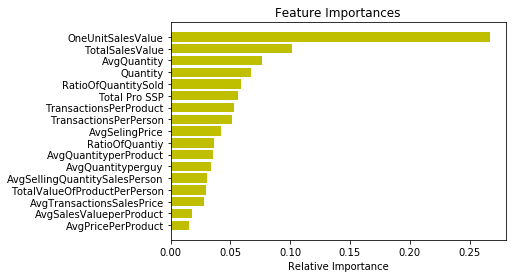

In [91]:
# plotting the attribute contributing more form the given model(Random Forest)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = feat_col
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Plotting Learning Curves

In [92]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Annaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

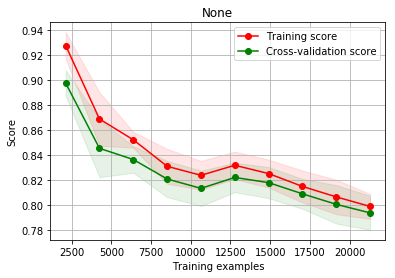

In [93]:
plot_learning_curve(rf, title=None,X=X_train, y=y_train)

## DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
estimator = DecisionTreeClassifier(max_depth=5,random_state=123)
estimator.fit(X_train, y_train) #fitting the model for the given data set(train set) this where the model learns 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [95]:
#from the learnt model we are predicting for the unknowns 
estimator_train_predictions_train=estimator.predict(X_train)
estimator_test_predictions_test=estimator.predict(X_test)

In [96]:
# from sklearn.metrics with classification_report we can validate the model by recall in this multiclass classification
from sklearn.metrics import classification_report
print(classification_report(y_test, estimator_test_predictions_test))
print(classification_report(y_train, estimator_train_predictions_train))

              precision    recall  f1-score   support

           1       0.08      0.04      0.06        45
           2       0.53      0.13      0.21       639
           3       0.94      0.99      0.97      9962

   micro avg       0.93      0.93      0.93     10646
   macro avg       0.52      0.39      0.41     10646
weighted avg       0.91      0.93      0.92     10646



### Plotting Learning Curves

In [97]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Annaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

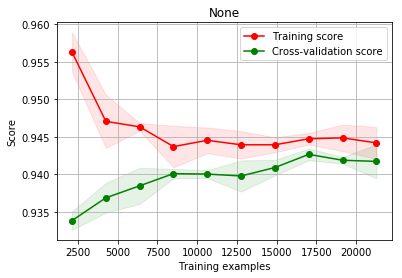

In [98]:
plot_learning_curve(estimator, title=None,X=X_train, y=y_train)

##  I went with RandomForestClassifier
looking at the learing rate RandomForestClassifier is the closet to the test scores with give a better recall than the other models 

# Cluster

Bob feels he sould have done this first!

In [213]:
cluster1=pd.read_excel("Train.xlsx",header=0)
cluster2=pd.read_excel("Test.xlsx",header=0)

In [215]:
cluster1["per_unit_price"]=cluster1.TotalSalesValue/cluster1.Quantity
cluster2["per_unit_price"]=cluster2.TotalSalesValue/cluster2.Quantity

In [194]:
#SalesPersonID = cluster1['SalesPersonID']

In [216]:
y=cluster1.Suspicious
X=cluster1.drop(["Suspicious","ReportID","SalesPersonID","ProductID"],axis=1)
test_X=cluster2.drop(["ReportID","SalesPersonID","ProductID"],axis=1)             

In [217]:
# spilt to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [219]:
# Normalizing to a range 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [224]:
norm=Normalizer().fit(X)
X_norm=norm.transform(X)
X_norm=norm.transform(X)
test_norm=norm.transform(test_X)

In [225]:
X_norm=pd.DataFrame(X_norm,columns=X.columns)

In [226]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X_norm)

In [227]:
X_norm['clusters'] = clusters
X_norm =X_norm.reset_index()
X_norm.head()

,index,Quantity,TotalSalesValue,per_unit_price,clusters
0,0,0.108660,0.994064,0.005462,0
1,1,0.104029,0.994559,0.005465,0
2,2,0.096656,0.995269,0.009854,0
3,3,0.062834,0.998018,0.003527,0
4,4,0.073517,0.997251,0.009234,0


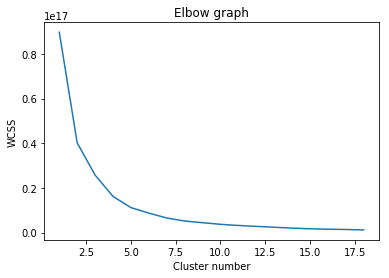

In [199]:
import matplotlib.pyplot as plt

plt.plot(range(1,19), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

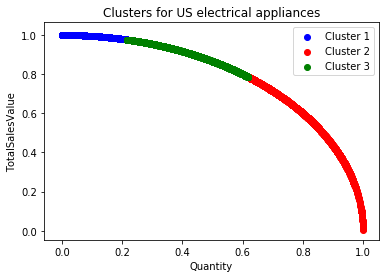

In [239]:
c1 = X_norm[X_norm.clusters == 0]#indeterminate
c2 = X_norm[X_norm.clusters == 1]#No
c3 = X_norm[X_norm.clusters == 2]#Yes
#c4 = rfm_segmentation[rfm_segmentation.clusters == 3]

plt.scatter(c1.Quantity, c1.TotalSalesValue, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Quantity, c2.TotalSalesValue, c = 'red', label = 'Cluster 2')
plt.scatter(c3.Quantity, c3.TotalSalesValue, c = 'green', label = 'Cluster 3')
#plt.scatter(c4.Recency, c4.Monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters for US electrical appliances')
plt.xlabel('Quantity')
plt.ylabel('TotalSalesValue')
plt.legend()

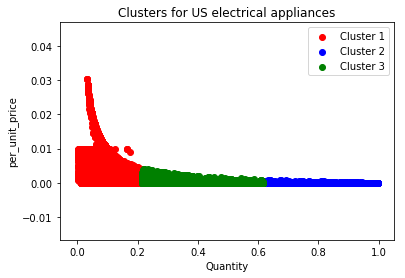

In [240]:
c1 = X_norm[X_norm.clusters == 0]
c2 = X_norm[X_norm.clusters == 1]
c3 = X_norm[X_norm.clusters == 2]
#c4 = X_train_norm[X_train_norm.clusters == 3]

plt.scatter(c1.Quantity, c1.per_unit_price, c = 'red', label = 'Cluster 1')
plt.scatter(c2.Quantity, c2.per_unit_price, c = 'blue', label = 'Cluster 2')
plt.scatter(c3.Quantity, c3.per_unit_price, c = 'green', label = 'Cluster 3')
#plt.scatter(c4.Quantity, c4.RFMScore, c = 'red', label = 'Cluster 4')

plt.title('Clusters for US electrical appliances')
plt.xlabel('Quantity')
plt.ylabel('per_unit_price')
plt.legend()

In [173]:
type(train_cluster)

pandas.core.frame.DataFrame

## Conclusion
even though the model didnot perform well, insights was found 
probably with better understanding of the attribute the model could have been enhanced